In [1]:
# import data

import re
import pandas as pd
import numpy as np
import sqlite3

# read database, change path and database name if needed
conn = sqlite3.connect('final_db_2.db')
cursor = conn.cursor()
result = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

In [2]:
# find table names - match data
table_names = sorted(list(zip(*result))[0])

# create first table
test_name = table_names[0]
data = pd.read_sql("SELECT * FROM '{}'".format(test_name), conn)

# append all match stats to one table
for name in table_names[1:]:
    data_i = pd.read_sql("SELECT * FROM '{}'".format(name), conn)
    data = pd.concat([data, data_i])

In [3]:
data = data.drop(columns = ['Team_name_home', 'Round_home', 'Team_name_away', 'Year_away', 'Round_away', 
                            'Results_away', 'Round_diff', 'Year_diff', 'Team_name_diff' ]) 
# only need result home 

In [4]:
data[data.isna().any(axis=1)]

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
687,55.0,76.0,13.0,4.0,-0.12,45.0,5.0,55.0,31.0,69.0,...,-12.0,3.0,1.0,-1.0,3.0,-3.0,24.0,-12.0,0.50,0.00
695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.0,4.0,2.0,-2.0,4.0,-4.0,15.0,-25.0,0.56,0.11
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-14.0,17.0,0.00,0.50
921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-20.0,17.0,0.00,0.50
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,-3.0,-1.0,1.0,-3.0,3.0,-13.0,6.0,0.33,0.67
1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-88.0,-3.0,-1.0,0.0,-3.0,-1.0,-98.0,-88.0,0.00,0.50
1298,69.0,104.0,16.0,3.0,-0.12,81.0,5.0,49.0,25.0,108.0,...,8.0,1.0,0.0,0.0,1.0,0.0,13.0,8.0,0.17,0.00
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,3.0,1.0,-1.0,2.0,-2.0,9.0,-3.0,0.50,0.00
1459,72.0,107.0,26.0,8.0,-14.00,76.0,5.0,47.0,19.0,103.0,...,-13.0,1.0,1.0,-1.0,1.0,-1.0,-8.0,-13.0,0.33,0.17
1460,85.0,104.0,19.0,9.0,-4.00,97.0,6.0,40.0,13.0,136.0,...,-7.0,0.0,0.0,0.0,0.0,0.0,-9.0,-7.0,0.33,0.33


In [5]:
data = data.dropna()
# check missing values for each of the variables
data.isnull().sum()

AVG_1_Points_home           0
AVG_1_Serve_number_home     0
AVG_1_Serve_errors_home     0
AVG_1_Serve_aces_home       0
AVG_1_Serve_%_effic_home    0
                           ..
Last_5_Sets_lost_diff       0
Last_5_Points_won_diff      0
Last_5_Points_lost_diff     0
%_points_poss_home          0
%_points_poss_away          0
Length: 278, dtype: int64

In [6]:
data.head()

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
0,56.0,85.0,17.0,0.0,-0.20,87.0,7.0,55.0,28.0,115.0,...,32.0,-2.0,-1.0,1.0,0.0,2.0,37.0,32.0,0.11,0.33
1,33.0,55.0,10.0,3.0,-0.13,55.0,5.0,61.0,27.0,68.0,...,-26.0,-2.0,-1.0,1.0,-3.0,1.0,-49.0,-26.0,0.00,0.33
2,33.0,55.0,14.0,2.0,-0.22,58.0,5.0,44.0,22.0,72.0,...,-28.0,-1.0,0.0,0.0,-2.0,0.0,-47.0,-28.0,0.00,0.17
3,71.0,106.0,15.0,5.0,-0.09,87.0,2.0,70.0,43.0,138.0,...,60.0,-2.0,-1.0,1.0,-1.0,3.0,32.0,60.0,0.17,0.50
4,71.0,93.0,18.0,10.0,-0.09,81.0,3.0,56.0,38.0,117.0,...,-14.0,1.0,0.0,0.0,0.0,-1.0,-20.0,-14.0,0.50,0.33


In [7]:
# define columns' names
new_col2 = ['AVG_1_Points_home',
 'AVG_1_Serve_number_home',
 'AVG_1_Serve_errors_home',
 'AVG_1_Serve_aces_home',
 'AVG_1_Serve_%_effic_home',
 'AVG_1_Rec_number_home',
 'AVG_1_Rec_errors_home',
 'AVG_1_Rec_%_pos_home',
 'AVG_1_Rec_%_perf_home',
 'AVG_1_Atack_number_home',
 'AVG_1_Atack_error_home',
 'AVG_1_Atack_blocked_home',
 'AVG_1_Atack_%_eff_home',
 'AVG_1_Block_points_home',
 'AVG_1_Points_net_home',
 'AVG_3_Points_home',
 'AVG_3_Serve_number_home',
 'AVG_3_Serve_errors_home',
 'AVG_3_Serve_aces_home',
 'AVG_3_Serve_%_effic_home',
 'AVG_3_Rec_number_home',
 'AVG_3_Rec_errors_home',
 'AVG_3_Rec_%_pos_home',
 'AVG_3_Rec_%_perf_home',
 'AVG_3_Atack_number_home',
 'AVG_3_Atack_error_home',
 'AVG_3_Atack_blocked_home',
 'AVG_3_Atack_%_eff_home',
 'AVG_3_Block_points_home',
 'AVG_3_Points_net_home',
 'AVG_5_Points_home',
 'AVG_5_Serve_number_home',
 'AVG_5_Serve_errors_home',
 'AVG_5_Serve_aces_home',
 'AVG_5_Serve_%_effic_home',
 'AVG_5_Rec_number_home',
 'AVG_5_Rec_errors_home',
 'AVG_5_Rec_%_pos_home',
 'AVG_5_Rec_%_perf_home',
 'AVG_5_Atack_number_home',
 'AVG_5_Atack_error_home',
 'AVG_5_Atack_blocked_home',
 'AVG_5_Atack_%_eff_home',
 'AVG_5_Block_points_home',
 'AVG_5_Points_net_home',
 'Height_avg_home',
 'Weight_avg_home',
 'Range_avg_home',
 'Opposite_Height_home',
 'Libero_Height_home',
 'Outside_Height_home',
 'Setter_Height_home',
 'Middle_Height_home',
 'Opposite_Weight_home',
 'Libero_Weight_home',
 'Outside_Weight_home',
 'Setter_Weight_home',
 'Middle_Weight_home',
 'Opposite_Range_home',
 'Libero_Range_home',
 'Outside_Range_home',
 'Setter_Range_home',
 'Middle_Range_home',
 'Points_home',
 'Matches_won_home',
 'Matches_lost_home',
 'Sets_won_home',
 'Sets_lost_home',
 'Points_won_home',
 'Points_lost_home',
 'Last_1_Points_home',
 'Last_1_Matches_won_home',
 'Last_1_Matches_lost_home',
 'Last_1_Sets_won_home',
 'Last_1_Sets_lost_home',
 'Last_1_Points_won_home',
 'Last_1_Points_lost_home',
 'Last_3_Points_home',
 'Last_3_Matches_won_home',
 'Last_3_Matches_lost_home',
 'Last_3_Sets_won_home',
 'Last_3_Sets_lost_home',
 'Last_3_Points_won_home',
 'Last_3_Points_lost_home',
 'Last_5_Points_home',
 'Last_5_Matches_won_home',
 'Last_5_Matches_lost_home',
 'Last_5_Sets_won_home',
 'Last_5_Sets_lost_home',
 'Last_5_Points_won_home',
 'Last_5_Points_lost_home',
 'ID',
 'Year_home',
 'Results_home',
 'AVG_1_Points_away',
 'AVG_1_Serve_number_away',
 'AVG_1_Serve_errors_away',
 'AVG_1_Serve_aces_away',
 'AVG_1_Serve_%_effic_away',
 'AVG_1_Rec_number_away',
 'AVG_1_Rec_errors_away',
 'AVG_1_Rec_%_pos_away',
 'AVG_1_Rec_%_perf_away',
 'AVG_1_Atack_number_away',
 'AVG_1_Atack_error_away',
 'AVG_1_Atack_blocked_away',
 'AVG_1_Atack_%_eff_away',
 'AVG_1_Block_points_away',
 'AVG_1_Points_net_away',
 'AVG_3_Points_away',
 'AVG_3_Serve_number_away',
 'AVG_3_Serve_errors_away',
 'AVG_3_Serve_aces_away',
 'AVG_3_Serve_%_effic_away',
 'AVG_3_Rec_number_away',
 'AVG_3_Rec_errors_away',
 'AVG_3_Rec_%_pos_away',
 'AVG_3_Rec_%_perf_away',
 'AVG_3_Atack_number_away',
 'AVG_3_Atack_error_away',
 'AVG_3_Atack_blocked_away',
 'AVG_3_Atack_%_eff_away',
 'AVG_3_Block_points_away',
 'AVG_3_Points_net_away',
 'AVG_5_Points_away',
 'AVG_5_Serve_number_away',
 'AVG_5_Serve_errors_away',
 'AVG_5_Serve_aces_away',
 'AVG_5_Serve_%_effic_away',
 'AVG_5_Rec_number_away',
 'AVG_5_Rec_errors_away',
 'AVG_5_Rec_%_pos_away',
 'AVG_5_Rec_%_perf_away',
 'AVG_5_Atack_number_away',
 'AVG_5_Atack_error_away',
 'AVG_5_Atack_blocked_away',
 'AVG_5_Atack_%_eff_away',
 'AVG_5_Block_points_away',
 'AVG_5_Points_net_away',
 'Height_avg_away',
 'Weight_avg_away',
 'Range_avg_away',
 'Opposite_Height_away',
 'Libero_Height_away',
 'Outside_Height_away',
 'Setter_Height_away',
 'Middle_Height_away',
 'Opposite_Weight_away',
 'Libero_Weight_away',
 'Outside_Weight_away',
 'Setter_Weight_away',
 'Middle_Weight_away',
 'Opposite_Range_away',
 'Libero_Range_away',
 'Outside_Range_away',
 'Setter_Range_away',
 'Middle_Range_away',
 'Points_away',
 'Matches_won_away',
 'Matches_lost_away',
 'Sets_won_away',
 'Sets_lost_away',
 'Points_won_away',
 'Points_lost_away',
 'Last_1_Points_away',
 'Last_1_Matches_won_away',
 'Last_1_Matches_lost_away',
 'Last_1_Sets_won_away',
 'Last_1_Sets_lost_away',
 'Last_1_Points_won_away',
 'Last_1_Points_lost_away',
 'Last_3_Points_away',
 'Last_3_Matches_won_away',
 'Last_3_Matches_lost_away',
 'Last_3_Sets_won_away',
 'Last_3_Sets_lost_away',
 'Last_3_Points_won_away',
 'Last_3_Points_lost_away',
 'Last_5_Points_away',
 'Last_5_Matches_won_away',
 'Last_5_Matches_lost_away',
 'Last_5_Sets_won_away',
 'Last_5_Sets_lost_away',
 'Last_5_Points_won_away',
 'Last_5_Points_lost_away',
 'AVG_1_Points_diff',
 'AVG_1_Serve_number_diff',
 'AVG_1_Serve_errors_diff',
 'AVG_1_Serve_aces_diff',
 'AVG_1_Serve_%_effic_diff',
 'AVG_1_Rec_number_diff',
 'AVG_1_Rec_errors_diff',
 'AVG_1_Rec_%_pos_diff',
 'AVG_1_Rec_%_perf_diff',
 'AVG_1_Atack_number_diff',
 'AVG_1_Atack_error_diff',
 'AVG_1_Atack_blocked_diff',
 'AVG_1_Atack_%_eff_diff',
 'AVG_1_Block_points_diff',
 'AVG_1_Points_net_diff',
 'AVG_3_Points_diff',
 'AVG_3_Serve_number_diff',
 'AVG_3_Serve_errors_diff',
 'AVG_3_Serve_aces_diff',
 'AVG_3_Serve_%_effic_diff',
 'AVG_3_Rec_number_diff',
 'AVG_3_Rec_errors_diff',
 'AVG_3_Rec_%_pos_diff',
 'AVG_3_Rec_%_perf_diff',
 'AVG_3_Atack_number_diff',
 'AVG_3_Atack_error_diff',
 'AVG_3_Atack_blocked_diff',
 'AVG_3_Atack_%_eff_diff',
 'AVG_3_Block_points_diff',
 'AVG_3_Points_net_diff',
 'AVG_5_Points_diff',
 'AVG_5_Serve_number_diff',
 'AVG_5_Serve_errors_diff',
 'AVG_5_Serve_aces_diff',
 'AVG_5_Serve_%_effic_diff',
 'AVG_5_Rec_number_diff',
 'AVG_5_Rec_errors_diff',
 'AVG_5_Rec_%_pos_diff',
 'AVG_5_Rec_%_perf_diff',
 'AVG_5_Atack_number_diff',
 'AVG_5_Atack_error_diff',
 'AVG_5_Atack_blocked_diff',
 'AVG_5_Atack_%_eff_diff',
 'AVG_5_Block_points_diff',
 'AVG_5_Points_net_diff',
 'Height_avg_diff',
 'Weight_avg_diff',
 'Range_avg_diff',
 'Opposite_Height_diff',
 'Libero_Height_diff',
 'Outside_Height_diff',
 'Setter_Height_diff',
 'Middle_Height_diff',
 'Opposite_Weight_diff',
 'Libero_Weight_diff',
 'Outside_Weight_diff',
 'Setter_Weight_diff',
 'Middle_Weight_diff',
 'Opposite_Range_diff',
 'Libero_Range_diff',
 'Outside_Range_diff',
 'Setter_Range_diff',
 'Middle_Range_diff',
 'Points_diff',
 'Matches_won_diff',
 'Matches_lost_diff',
 'Sets_won_diff',
 'Sets_lost_diff',
 'Points_won_diff',
 'Points_lost_diff',
 'Last_1_Points_diff',
 'Last_1_Matches_won_diff',
 'Last_1_Matches_lost_diff',
 'Last_1_Sets_won_diff',
 'Last_1_Sets_lost_diff',
 'Last_1_Points_won_diff',
 'Last_1_Points_lost_diff',
 'Last_3_Points_diff',
 'Last_3_Matches_won_diff',
 'Last_3_Matches_lost_diff',
 'Last_3_Sets_won_diff',
 'Last_3_Sets_lost_diff',
 'Last_3_Points_won_diff',
 'Last_3_Points_lost_diff',
 'Last_5_Points_diff',
 'Last_5_Matches_won_diff',
 'Last_5_Matches_lost_diff',
 'Last_5_Sets_won_diff',
 'Last_5_Sets_lost_diff',
 'Last_5_Points_won_diff',
 'Last_5_Points_lost_diff',
 '%_points_poss_home',
 '%_points_poss_away',
 '%_points_poss_diff']

In [8]:
data['%_points_poss_diff'] = data['%_points_poss_home'] - data['%_points_poss_away']

In [9]:
data.columns = new_col2

In [10]:
# define column with the result
df1 = data.pop('Results_home') 
data['Result']=df1 

In [11]:
in_sample = data[data['Year_home'].isin(['2020/2021', '2019/2020', '2018/2019', '2017/2018', '2016/2017', '2015/2016', '2014/2015', '2013/2014', 
        '2012/2013', '2011/2012', '2010/2011'])]

In [12]:
labels = in_sample.pop('Result')

In [13]:
in_sample = in_sample.drop(columns=['ID', 'Year_home'])

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(in_sample, labels, test_size = 0.3, random_state = 30)

In [15]:
out_of_time = data[data['Year_home'] == ('2021/2022')]

In [16]:
y_oot = out_of_time['Result']

In [17]:
X_oot = out_of_time.drop(columns=['ID', 'Result', 'Year_home'])

In [18]:
print(y_train.value_counts(normalize=True))  
print(y_test.value_counts(normalize=True))
print(y_oot.value_counts(normalize=True))

1.0    0.53257
0.0    0.46743
Name: Result, dtype: float64
1.0    0.561475
0.0    0.438525
Name: Result, dtype: float64
1.0    0.525714
0.0    0.474286
Name: Result, dtype: float64


In [19]:
# import XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [20]:
# define parameters
param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1, 0.3],
        'max_depth': [3, 5, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.1, 0.3, 0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100, 200, 500, 1000],
        'objective': ['binary:logistic']
    }

In [ ]:
xgb_model = XGBClassifier()

gsearch = GridSearchCV(estimator = xgb_model,
                      param_grid = param_tuning,                        
                       cv = 5,
                       n_jobs = 1,
                       verbose = 1)

gsearch.fit(X_train,y_train)

gsearch.best_params_

In [21]:
# final model
xgb_model = XGBClassifier(colsample_bytree=0.5,learning_rate=0.01, max_depth= 5, min_child_weight=1,
 n_estimators=200, objective='binary:logistic', subsample= 0.1)
xgb_model.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [22]:
# calculate predictions
y_train_pred = xgb_model.predict_proba(X_train)[:,1]
y_test_pred = xgb_model.predict_proba(X_test)[:,1]

In [23]:
# print scores on training and testing set
print('Training set accuracy: {:.4f}'.format(xgb_model.score(X_train, y_train)))
print('Test set accuracy: {:.4f}'.format(xgb_model.score(X_test, y_test)))
print('Training set AUC: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
print('Test set AUC: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))

Training set accuracy: 0.7676
Test set accuracy: 0.7295
Training set AUC: 0.8575
Test set AUC: 0.7837


In [30]:
y_oot_pred = xgb_model.predict_proba(X_oot)[:,1]
y_oot_pred

array([0.5088642 , 0.35181418, 0.42423868, 0.6464298 , 0.6259557 ,
       0.35140508, 0.7161068 , 0.55772674, 0.53454626, 0.7306953 ,
       0.5575803 , 0.54055107, 0.6281596 , 0.46947998, 0.32759386,
       0.2818804 , 0.36428532, 0.33338842, 0.26268578, 0.5024952 ,
       0.58415604, 0.71441835, 0.45289382, 0.49543417, 0.6878557 ,
       0.48993257, 0.61338526, 0.3099706 , 0.25104254, 0.5450944 ,
       0.3551606 , 0.44442588, 0.6868765 , 0.6011165 , 0.6283863 ,
       0.73264396, 0.31472084, 0.23222844, 0.2387286 , 0.7882571 ,
       0.35241833, 0.63330793, 0.5154328 , 0.50182515, 0.22101223,
       0.36225042, 0.4959523 , 0.7230854 , 0.70320624, 0.58610815,
       0.30548206, 0.22574008, 0.33498523, 0.33127987, 0.794855  ,
       0.5901758 , 0.70903397, 0.37758145, 0.5433472 , 0.6762007 ,
       0.60971916, 0.81364244, 0.7736835 , 0.34780774, 0.26627174,
       0.33699882, 0.20955469, 0.61095774, 0.2962076 , 0.60664463,
       0.7527304 , 0.59250957, 0.6629587 , 0.6376792 , 0.78782

In [25]:
print('Out of time accuracy: {:.4f}'.format(xgb_model.score(X_oot, y_oot)))
print('Out of time set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred)))

Out of time accuracy: 0.7257
Out of time set AUC: 0.7575


### Confidence interval

In [26]:
y_oot = y_oot.reset_index(drop=True)
y_oot_pred = pd.Series(y_oot_pred).reset_index(drop=True)

In [27]:
import numpy as np
np.random.seed(1234)
rng=np.random.RandomState(1234)

def get_ci_auc( y_true, y_pred ): 

    from scipy.stats import sem
    from sklearn.metrics import roc_auc_score 
   
    n_bootstraps = 10000 
    bootstrapped_scores = []   
   
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred) - 1, len(y_pred))
       
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)   
 
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

   # 90% c.i.
   # confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
   # confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
 
    # 95% c.i.
    confidence_lower = sorted_scores[int(0.0125 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.9875 * len(sorted_scores))]
   
    return confidence_lower,confidence_upper

In [28]:
ci_lower, ci_upper = get_ci_auc(y_oot, y_oot_pred)

In [30]:
print('Out of time set AUC: {:.4f}, with confidence interval: {:.4f} - {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred), ci_lower, ci_upper))

Out of time set AUC: 0.7575, with confidence interval: 0.6762 - 0.8392


### Histograms 

In [31]:
y_pred_test_all = xgb_model.predict_proba(X_test)

In [40]:
df_plot = pd.DataFrame(y_pred_test_all, columns = ['defeat','win'])
df_plot

,defeat,win
0,0.648867,0.351133
1,0.374131,0.625869
2,0.410431,0.589569
3,0.177216,0.822784
4,0.189739,0.810261
...,...,...
483,0.388429,0.611571
484,0.772218,0.227782
485,0.242864,0.757136
486,0.709523,0.290477


array([[<Axes: title={'center': 'defeat'}>,
        <Axes: title={'center': 'win'}>]], dtype=object)

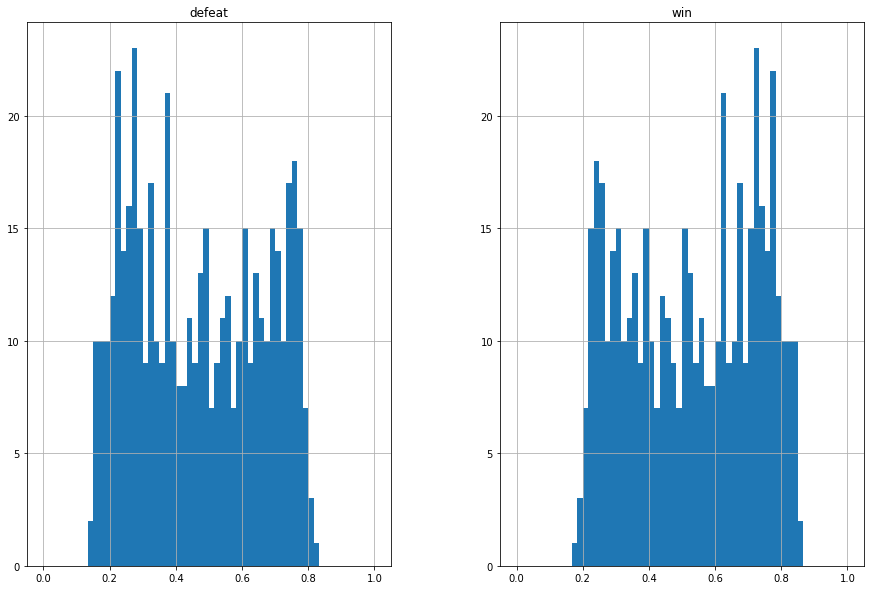

In [33]:
df_plot.hist(bins = 60, figsize=(15, 10), range=[0, 1])

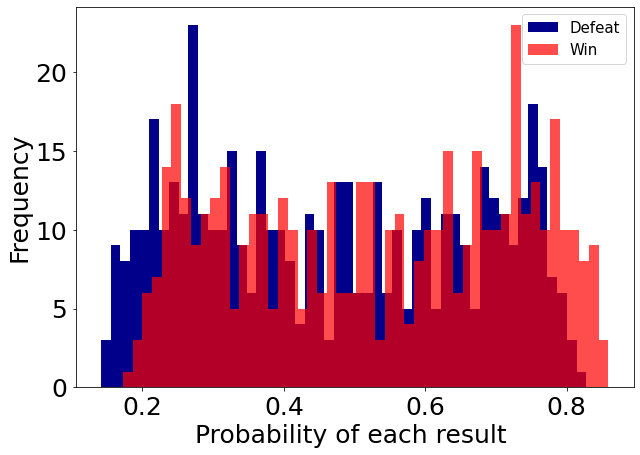

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df_plot.iloc[:, 0], bins=50, label='Defeat', color='darkblue')
plt.hist(df_plot.iloc[:, 1], bins=50, label='Win', alpha=0.7, color='red')
plt.xlabel('Probability of each result ', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

### Plot labels

In [103]:
y_labels = xgb_model.predict(X_test)

In [104]:
y_labels = pd.Series(y_labels)

In [105]:
y_labels

0      0
1      1
2      1
3      1
4      1
      ..
483    1
484    0
485    1
486    0
487    1
Length: 488, dtype: int32

In [106]:
y_test = y_test.astype('int32')

In [107]:
plott = [y_test, y_labels]

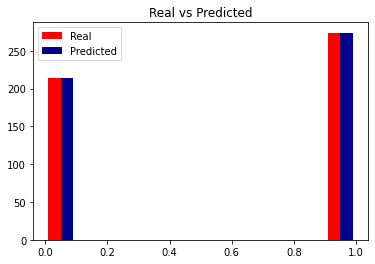

In [108]:
#Plot Real vs Predict
colors = ['red', 'darkblue']
labels = ['Real', 'Predicted']

plt.hist(plott, label=labels, color=colors, histtype='bar')
plt.title("Real vs Predicted")
plt.legend(loc='best')
plt.show()

In [109]:
y_test = y_test.reset_index(drop=True)

In [110]:
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = y_labels

In [111]:
base

,actual,predictions
0,1,0
1,0,1
2,0,1
3,1,1
4,0,1
...,...,...
483,1,1
484,1,0
485,1,1
486,0,0


In [114]:
base.groupby(['actual']).size()

actual
0    214
1    274
dtype: int64

In [115]:
base.groupby(['predictions']).size()

predictions
0    214
1    274
dtype: int64

In [ ]:
# optimal treshhold

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
predictions_test = xgb_model.predict(X_test)

false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_test_pred)

optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_test_pred]

In [27]:
# optimal treshhold
optimal_proba_cutoff

0.5183887

In [28]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_test, predictions_test), accuracy_score(y_test, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_test, predictions_test), precision_score(y_test, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_test, predictions_test), recall_score(y_test, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_test, predictions_test), f1_score(y_test, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.7295081967213115, 0.7336065573770492
Precision Score Before and After Thresholding: 0.7591240875912408, 0.7790697674418605
Recall Score Before and After Thresholding: 0.7591240875912408, 0.7335766423357665
F1 Score Before and After Thresholding: 0.7591240875912408, 0.7556390977443609
